<p style="font-size:30px; color:black;">
    CH4130 Process Optimization </p>
<p style="font-size:25px; color:black;">
Tutorial 2: Exploratory Data Analysis (EDA) and Correlations
</p>


This tutorial is to explore data visualization and correlation analysis using Python. You can use any other tools (even Excel) for this purpose, but Python is highly encouraged.

Use vibe coding if you are not not familiar with Python.

**About Data:**

This is a synthetic dataset simulating the yield of a reactor. The variables are;
- Temperature
- Pressure
- Catalyst Concentration
- Feed Flow Rate
- Catalyst Supplier
- Yield

# Libraries

# Read Reactor Data


Data Location: https://raw.githubusercontent.com/dissabnd/CH4130-Process-Optimization/refs/heads/main/data/reactor_data.csv

**Prompt:**

Load data into df from https://raw.githubusercontent.com/dissabnd/CH4130-Process-Optimization/refs/heads/main/data/reactor_data.csv


In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dissabnd/CH4130-Process-Optimization/refs/heads/main/data/reactor_data.csv')
df.head(10)

,Temperature (°C),Pressure (bar),Catalyst Concentration (wt%),Feed Flow Rate (L/min),Catalyst Supplier,Yield (%)
0,206.22,6.32,2.08,10.55,A,67.77
1,246.55,4.98,2.80,10.12,A,86.93
2,231.24,4.79,2.81,9.85,A,80.45
3,221.91,5.48,2.96,10.81,A,77.90
4,190.92,6.47,3.09,9.22,A,84.60
5,190.92,4.98,3.46,9.99,B,79.39
6,184.07,5.84,2.77,9.02,A,76.49
7,240.63,6.02,2.48,9.94,A,84.72
8,222.08,4.98,3.19,9.11,B,79.70
9,229.57,5.96,2.41,9.24,B,78.29


# Part 1: Descriptive Stats (mean, median and SD)

**Prompt:**

Can you give me a python code to generate summary stats of below table?

In [3]:
display(df.describe())

,Temperature (°C),Pressure (bar),Catalyst Concentration (wt%),Feed Flow Rate (L/min),Yield (%)
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,213.102000,5.534667,2.744067,10.051200,76.130733
std,20.756918,0.582709,0.451812,0.608127,6.770026
min,180.390000,4.510000,2.020000,9.020000,60.000000
25%,195.032500,4.997500,2.372500,9.527500,71.015000
50%,211.365000,5.610000,2.755000,10.065000,76.390000
75%,232.477500,6.012500,3.130000,10.627500,81.210000
max,249.080000,6.480000,3.490000,11.000000,95.000000


# Part 2: Data Visualization

## 2.1 Data Distributions with Histogram

**Prompt:**

Give the python code for below. Generate histogram plots for each variables using seaborn. Create a figure, then do subplots.

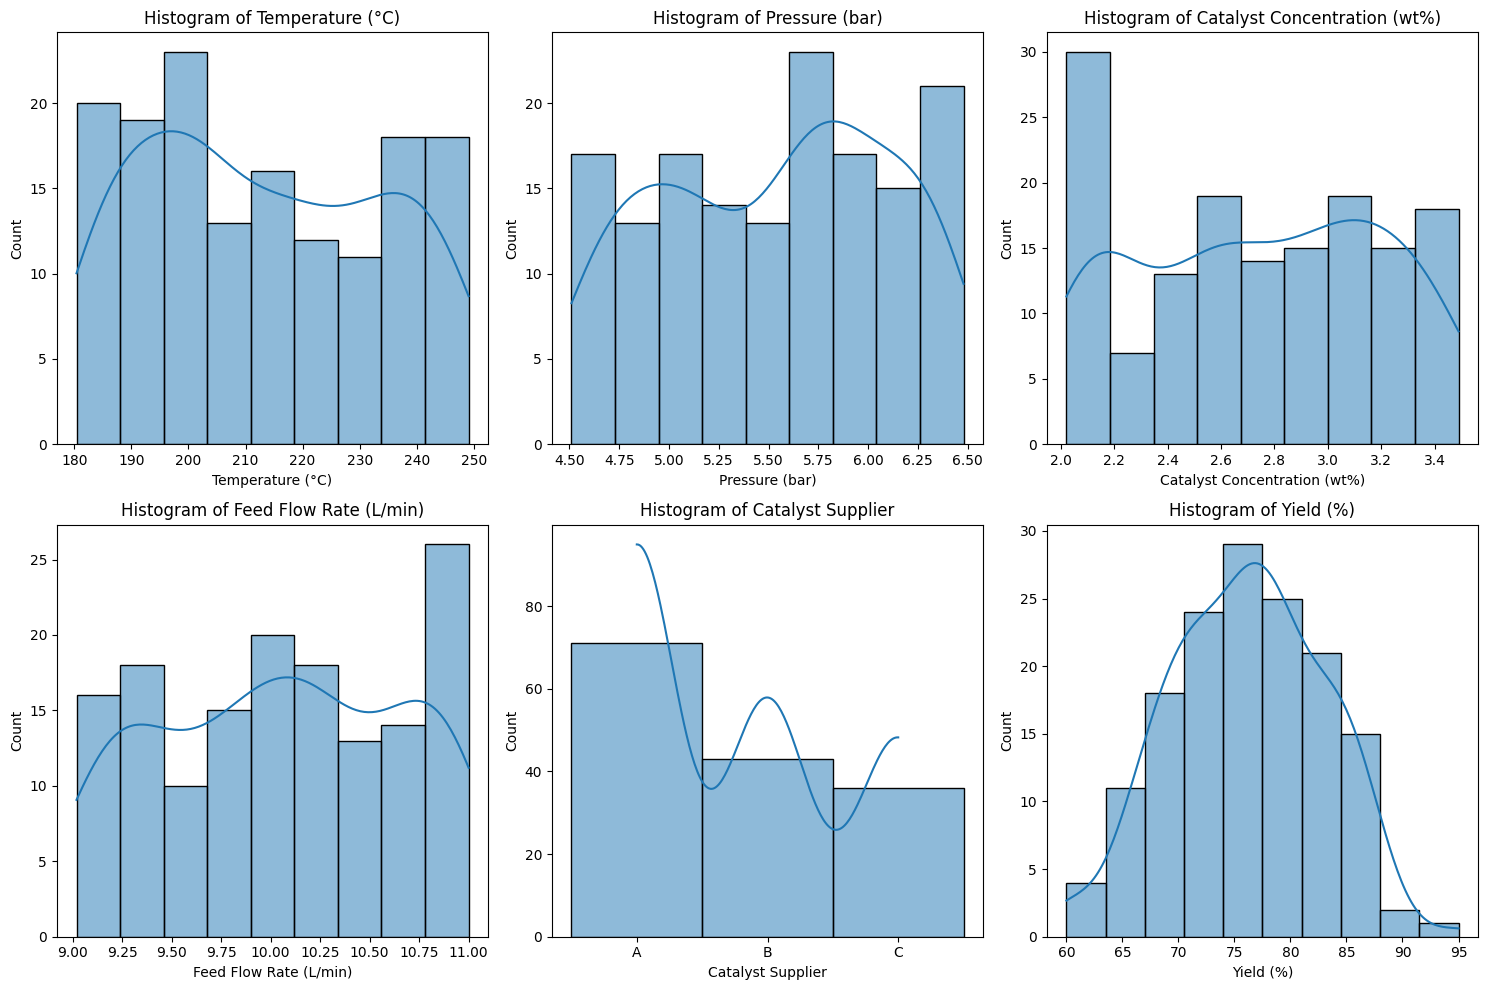

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the columns and create a histogram for each
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')

# Adjust the layout
plt.tight_layout()
plt.show()

## 2.2 Data distributions with box plot

**Prompt:**

Give the python code for below. Generate box plots for each numerical variables using seaborn. Create a figure, then do subplots.

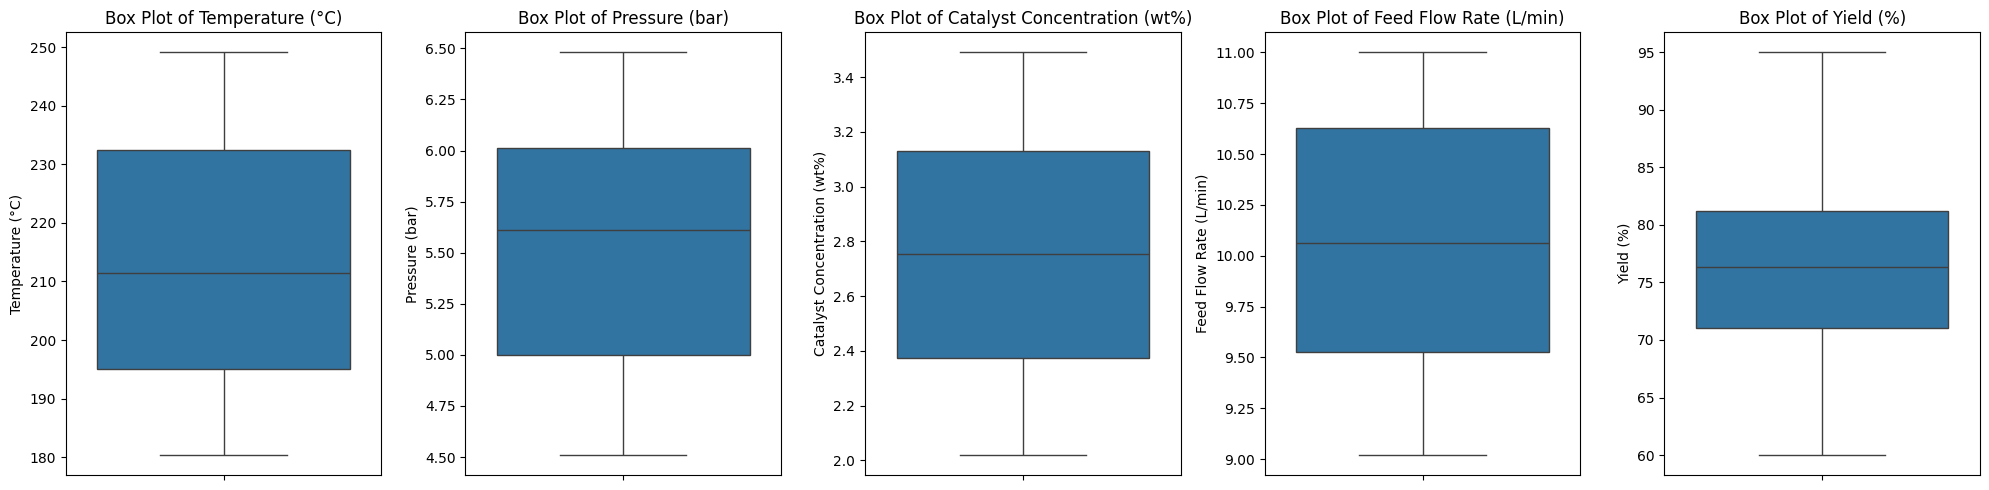

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(20, 5))

# Iterate over the numerical columns and create a box plot for each
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Adjust the layout
plt.tight_layout()
plt.show()

## 2.3 Relationship between Reactor Yield and Other Variables

### 2.3.1 XY scatter plot

**Prompt:**

Give the python code for below. Generate xy scatter plot using Yield as y variable and other numerical var as x. Create a figure and then do subplots. Use regplot.

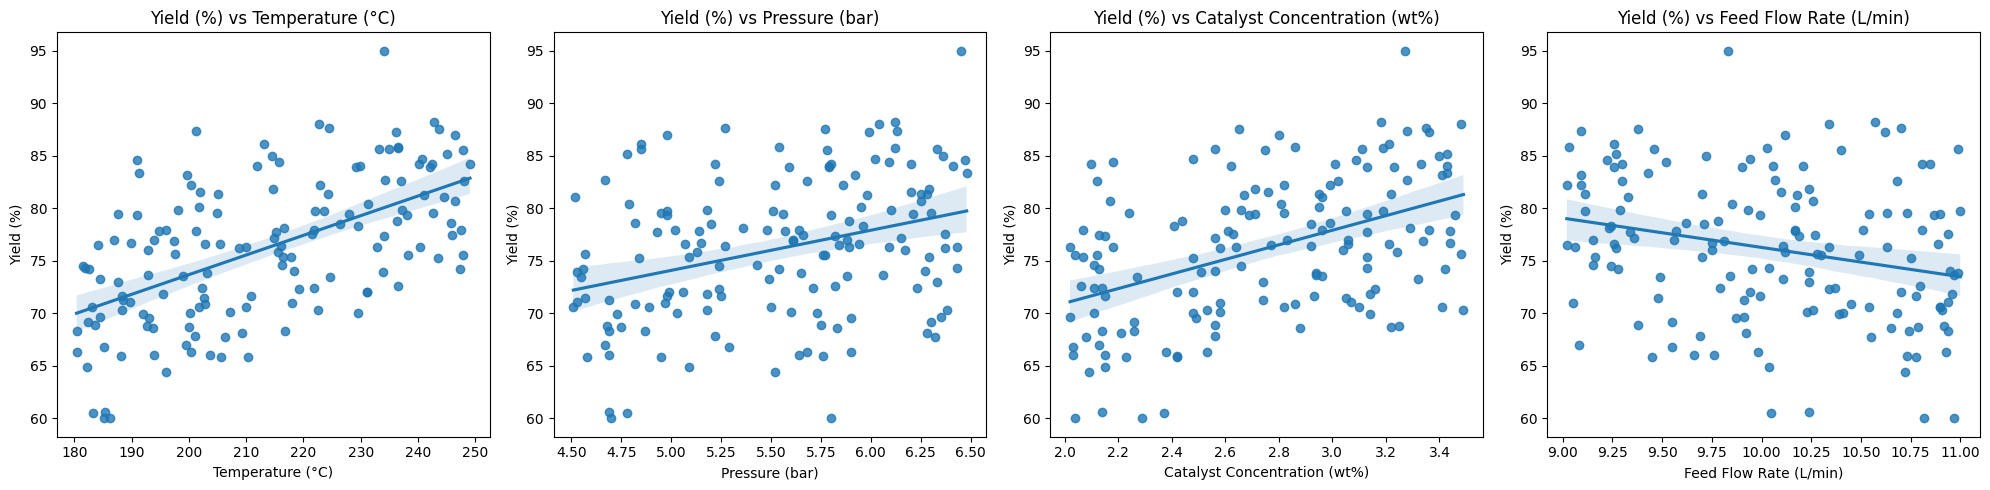

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns excluding 'Yield (%)'
numerical_cols = df.select_dtypes(include=['number']).columns.drop('Yield (%)')

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(20, 5))

# Iterate over the numerical columns and create a scatter plot for each
for i, col in enumerate(numerical_cols):
    sns.regplot(x=df[col], y=df['Yield (%)'], ax=axes[i])
    axes[i].set_title(f'Yield (%) vs {col}')

# Adjust the layout
plt.tight_layout()
plt.show()

### 2.3.2 Yield and Supplier - Bar plot

**Prompt:**

Create a bar plot using catalyst supplier as x and yiled as y. Use standard error in error bars. Use sns barplot option

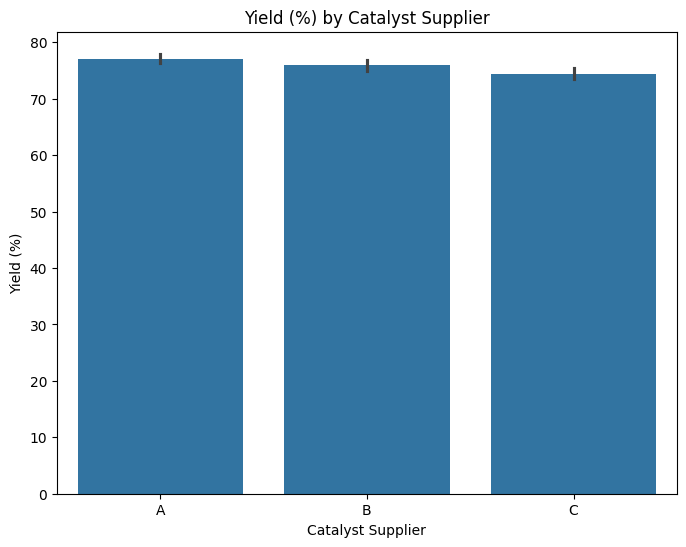

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x='Catalyst Supplier', y='Yield (%)', data=df, errorbar='se')
plt.title('Yield (%) by Catalyst Supplier')
plt.show()

### 2.3.3 Yield and Supplier - Violin plot

**Prompt:**

Create a violin plot using catalyst supplier as x and yiled as y. Use standard error in error bars. Use sns barplot option

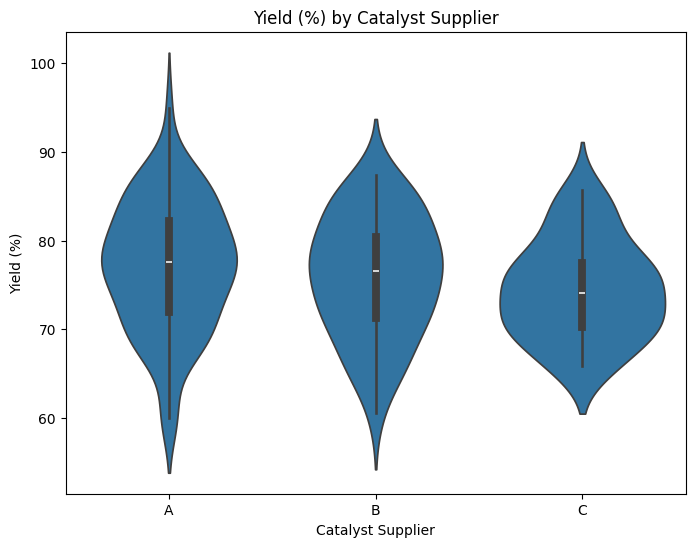

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.violinplot(x='Catalyst Supplier', y='Yield (%)', data=df)
plt.title('Yield (%) by Catalyst Supplier')
plt.show()

### 2.3.3 Yield and Supplier - Violin plot

**Prompt:**

Create a violin plot using catalyst supplier as x and yiled as y. Use standard error in error bars. Use sns barplot option

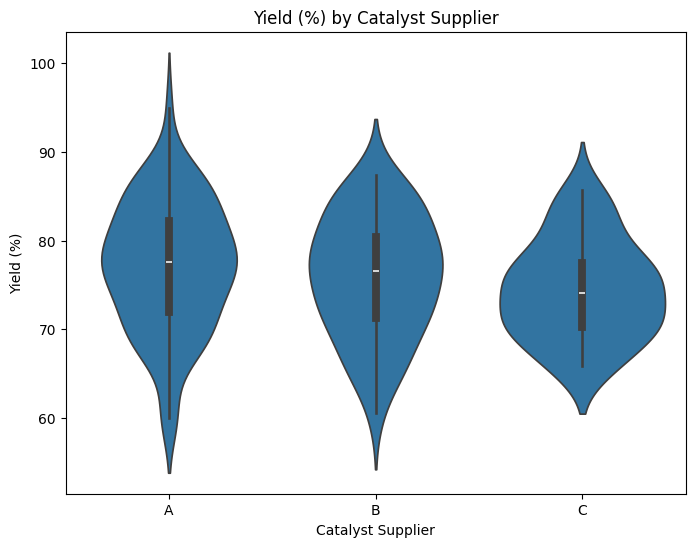

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.violinplot(x='Catalyst Supplier', y='Yield (%)', data=df)
plt.title('Yield (%) by Catalyst Supplier')
plt.show()

### 2.3.3 Yield and Supplier - Violin plot

**Prompt:**

Create a violin plot using catalyst supplier as x and yiled as y. Use standard error in error bars. Use sns barplot option

# Part 3: Correlatoin Analysis

## 3.1 Pearson correlation

**Prompt:**

Create correlation matrix using Pearson correlation

,Temperature (°C),Pressure (bar),Catalyst Concentration (wt%),Feed Flow Rate (L/min),Yield (%)
Temperature (°C),1.000000,0.036120,-0.136279,-0.021430,0.574045
Pressure (bar),0.036120,1.000000,-0.036880,-0.074675,0.329049
Catalyst Concentration (wt%),-0.136279,-0.036880,1.000000,0.009926,0.463196
Feed Flow Rate (L/min),-0.021430,-0.074675,0.009926,1.000000,-0.250595
Yield (%),0.574045,0.329049,0.463196,-0.250595,1.000000


## 3.2 Correlation heat map

**Prompt:**

Create the heatmap of the correlations

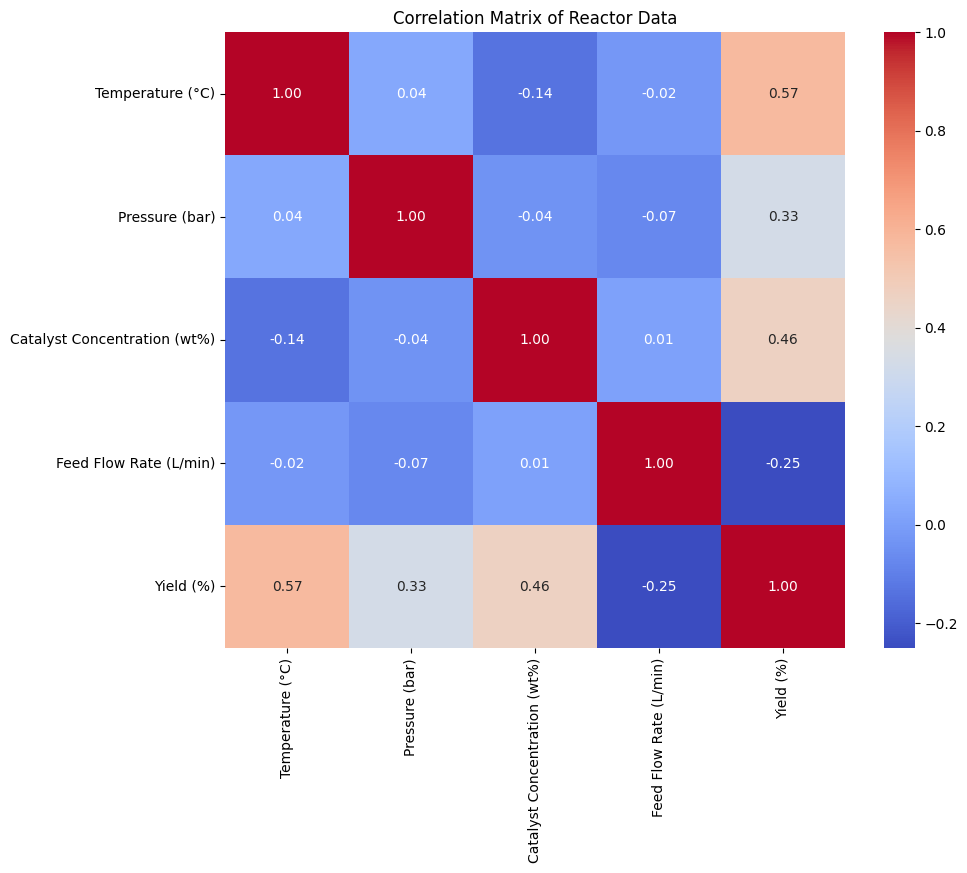

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Reactor Data')
plt.show()